In [3]:
import pyvinecopulib as pv
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as scs
from statsmodels.distributions.empirical_distribution import ECDF as fit_ecdf
import seaborn as sns
from tqdm import tqdm

# Empirical investigation of classifier equivalences

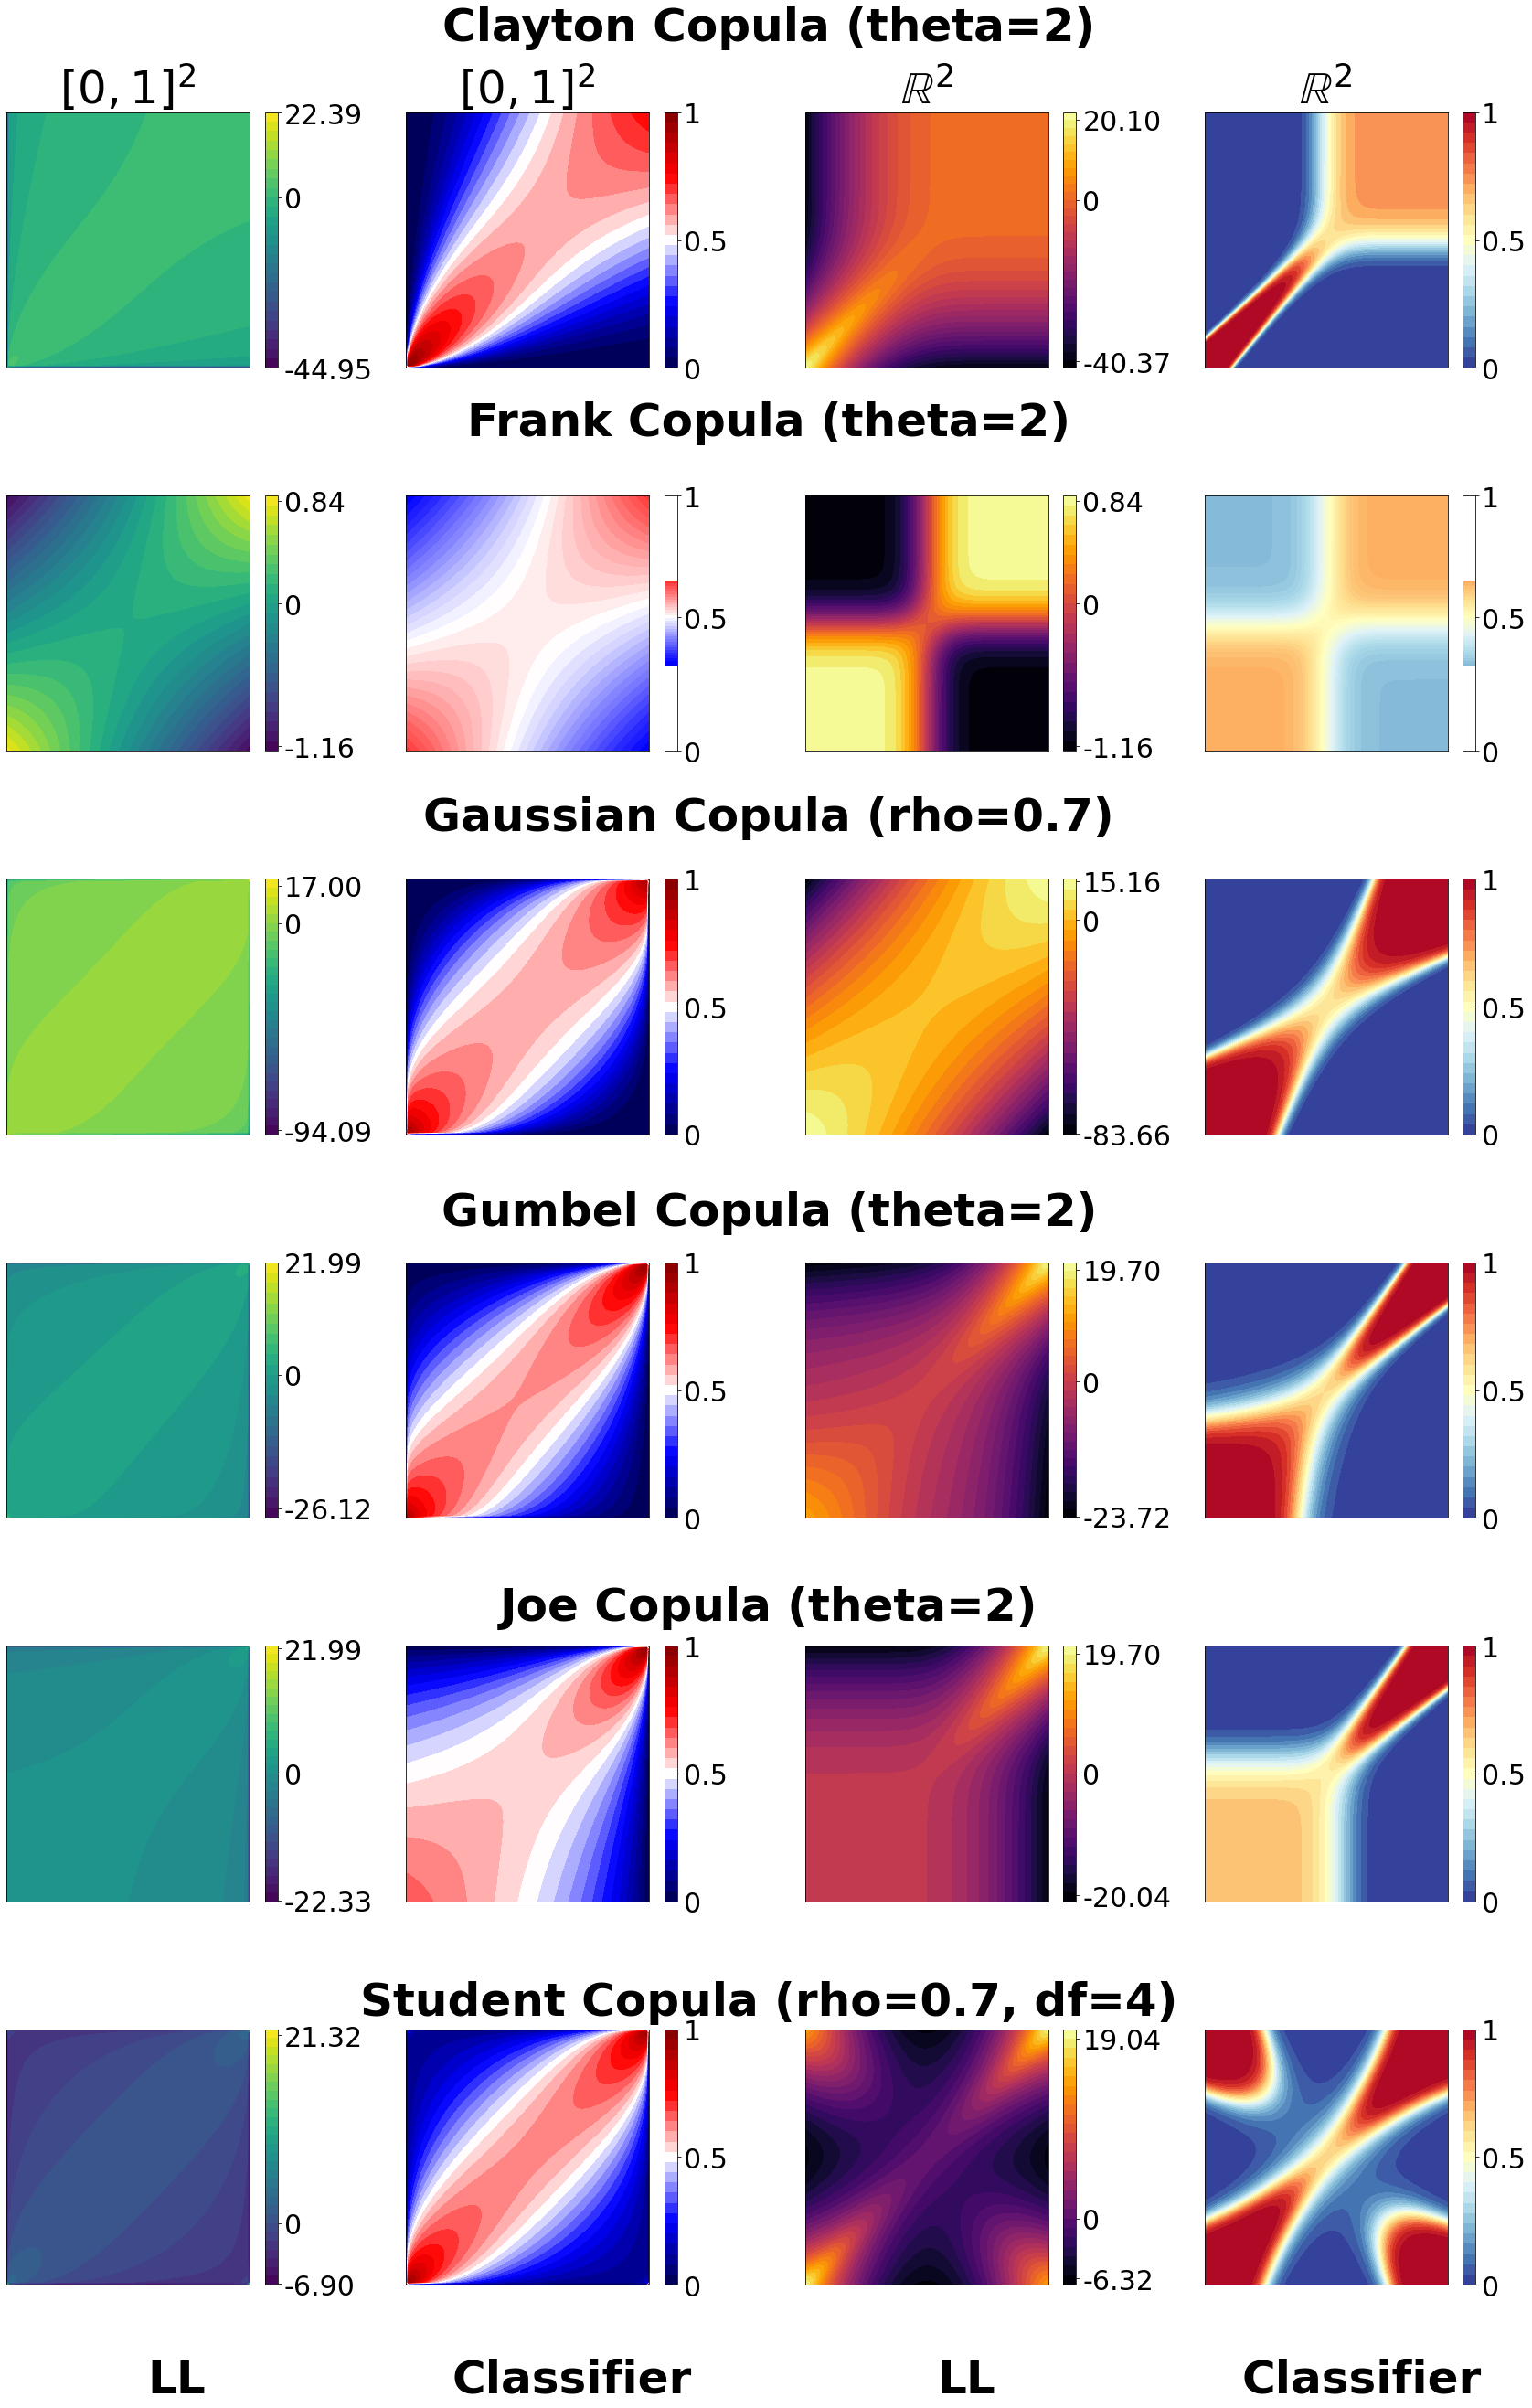

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as pv
import scipy.stats as scs

# Define the list of copulas
copulas = [
    pv.Bicop(family=pv.BicopFamily.clayton, parameters=np.array([2],dtype=np.float64)),
    pv.Bicop(family=pv.BicopFamily.frank, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.gaussian, rotation=0, parameters=[0.7]),
    pv.Bicop(family=pv.BicopFamily.gumbel, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.joe, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.student, rotation=0, parameters=[0.7, 4]),
]

# Define the titles for the plots
titles_ = [
    'Clayton Copula (theta=2)',
    'Frank Copula (theta=2)',
    'Gaussian Copula (rho=0.7)',
    'Gumbel Copula (theta=2)',
    'Joe Copula (theta=2)',
    'Student Copula (rho=0.7, df=4)'
]

# Create the grid
grid_size = 100
u = np.linspace(0, 1, grid_size)
v = np.linspace(0, 1, grid_size)
z1 = np.linspace(-6, 6, grid_size)
z2 = np.linspace(-6, 6, grid_size)

U, V = np.meshgrid(u, v)
Z1, Z2 = np.meshgrid(z1, z2)
points = np.column_stack([U.ravel(), V.ravel()])
points_z = np.column_stack([Z1.ravel(), Z2.ravel()])
# Create the subplot
num_copulas = len(copulas)
fig, axes = plt.subplots(num_copulas, 4, figsize=(24, 6 * num_copulas))

ticks_size = 30
tick_size = 50
u_v_size = 35

for i, (cop, title) in enumerate(zip(copulas, titles_)):
    # Compute the PDF values
    cop_pdf = np.log(cop.pdf(points).reshape(grid_size, grid_size))
    cop_pdf_z = np.log(cop.pdf(scs.norm.cdf(points_z)).reshape(grid_size, grid_size))
    
    
    # Plot the contour plot
    contour = axes[i, 0].contourf(U, V, cop_pdf, levels=30, cmap='viridis')
    cbar = fig.colorbar(contour, ax=axes[i, 0])
    cbar.ax.tick_params(labelsize=ticks_size)
    cbar.set_ticks([cop_pdf.min(), 0, cop_pdf.max()])
    cbar.set_ticklabels([f'{cop_pdf.min():.2f}', '0', f'{cop_pdf.max():.2f}'])
    #axes[i, 0].set_xlabel(r'$U$', fontsize=u_v_size)
    #axes[i, 0].set_ylabel(r'$V$', fontsize=u_v_size)
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    # Compute the transformed PDF values
    cop_classifier = np.exp(cop_pdf) / (1 + np.exp(cop_pdf))
    
    # Plot the transformed contour plot with fixed color scale
    contour_r = axes[i, 1].contourf(U, V, cop_classifier, levels=30, cmap='seismic', vmin=0, vmax=1)
    cbar_r = fig.colorbar(contour_r, ax=axes[i, 1])
    cbar_r.ax.tick_params(labelsize=ticks_size)
    cbar_r.set_ticks([0, 0.5, 1])
    cbar_r.set_ticklabels(['0', '0.5', '1'])
    #axes[i, 1].set_xlabel(r'$U$', fontsize=u_v_size)
    #axes[i, 1].set_ylabel(r'$V$', fontsize=u_v_size)
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

    # Plot the logpdf on Gaussian space
    contour_z = axes[i, 2].contourf(Z1, Z2, cop_pdf_z, levels=30, cmap='inferno')
    cbar_z = fig.colorbar(contour_z, ax=axes[i, 2])
    cbar_z.ax.tick_params(labelsize=ticks_size)
    cbar_z.set_ticks([cop_pdf_z.min(), 0, cop_pdf_z.max()])
    cbar_z.set_ticklabels([f'{cop_pdf_z.min():.2f}', '0', f'{cop_pdf_z.max():.2f}'])
    #axes[i, 2].set_xlabel(r'$\Phi^{-1}(U)$', fontsize=u_v_size)
    #axes[i, 2].set_ylabel(r'$\Phi^{-1}(V)$', fontsize=u_v_size)
    axes[i, 2].set_xticks([])
    axes[i, 2].set_yticks([])

    # Plot the classifier on Gaussian space with fixed color scale
    cop_classifier_z = np.exp(cop_pdf_z) / (1 + np.exp(cop_pdf_z))
    contour_z_r = axes[i, 3].contourf(Z1, Z2, cop_classifier_z, levels=30, cmap='RdYlBu_r', vmin=0, vmax=1)
    cbar_z_r = fig.colorbar(contour_z_r, ax=axes[i, 3])
    cbar_z_r.ax.tick_params(labelsize=ticks_size)
    cbar_z_r.set_ticks([0, 0.5, 1])
    cbar_z_r.set_ticklabels(['0', '0.5', '1'])
    #axes[i, 3].set_xlabel(r'$\Phi^{-1}(U)$', fontsize=u_v_size)
    #axes[i, 3].set_ylabel(r'$\Phi^{-1}(V)$', fontsize=u_v_size)
    axes[i, 3].set_xticks([])
    axes[i, 3].set_yticks([])

    # Add the copula name in the middle of the 4 subplots
    fig.text(0.5, 1.0025 - (i ) / num_copulas, title, ha='center', va='center', fontsize=50, weight='bold')

    if i==0:
        axes[i, 0].set_title(r'$[0,1]^2$', fontsize=tick_size, weight='bold')
        axes[i, 1].set_title(r'$[0,1]^2$', fontsize=tick_size, weight='bold')
        axes[i, 2].set_title(r'$\mathbb{R}^2$', fontsize=tick_size, weight='bold')
        axes[i, 3].set_title(r'$\mathbb{R}^2$', fontsize=tick_size, weight='bold')

# Add column titles at the bottom
fig.text(0.125, 0.01, 'LL', ha='center', va='center', fontsize=50, weight='bold')
fig.text(0.375, 0.01, 'Classifier', ha='center', va='center', fontsize=50, weight='bold')
fig.text(0.625, 0.01, 'LL', ha='center', va='center', fontsize=50, weight='bold')
fig.text(0.875, 0.01, 'Classifier', ha='center', va='center', fontsize=50, weight='bold')

# Adjust layout to add vertical space between rows
plt.tight_layout(pad=3.0)
fig.subplots_adjust(hspace=0.5, bottom=0.05)

plt.savefig('copula_classifier.png',dpi=150, bbox_inches='tight')